<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/NEW_KNN(GFI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# basic KNN

In [105]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
# Download 10 years of Gold Fields stock data
ticker = "GFI.JO"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")

# Keep required features (including Volume)
df = data[['Close', 'High', 'Low', 'Open', 'Volume']].copy()

# Create target variable: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop last row (since it has no next day target)
df = df.dropna()

df.tail()


/tmp/ipython-input-670492372.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Target
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,
Date,,,,,,
2024-12-20,25710.158203,25726.155191,24762.336699,25351.225798,5006397,0
2024-12-23,24765.335938,25806.139923,24680.351943,25310.233317,1293370,1
2024-12-24,25406.214844,25571.183773,24765.335551,25085.275291,334453,0
2024-12-27,25074.277344,25918.118409,24735.341181,25105.271506,817916,0
2024-12-30,24805.328125,25098.272951,24517.382357,24827.323982,1012028,0


In [107]:
# Train on all years except 2024, test only on 2024
train_df = df[df.index.year < 2024]
test_df = df[df.index.year == 2024]

X_train = train_df[['Close', 'High', 'Low', 'Open']]
y_train = train_df['Target']

X_test = test_df[['Close', 'High', 'Low', 'Open']]
y_test = test_df['Target']


In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
from sklearn.metrics import accuracy_score

best_k = 1
best_acc = 0

for k in range(1, 21):  # check k = 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)

    print(f"k = {k}, Accuracy = {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k

print("\nBest k is:", best_k, "with Accuracy:", round(best_acc, 4))


k = 1, Accuracy = 0.5422
k = 2, Accuracy = 0.5020
k = 3, Accuracy = 0.5221
k = 4, Accuracy = 0.4819
k = 5, Accuracy = 0.4900
k = 6, Accuracy = 0.4819
k = 7, Accuracy = 0.4819
k = 8, Accuracy = 0.4739
k = 9, Accuracy = 0.4739
k = 10, Accuracy = 0.4859
k = 11, Accuracy = 0.5382
k = 12, Accuracy = 0.5060
k = 13, Accuracy = 0.5060
k = 14, Accuracy = 0.4940
k = 15, Accuracy = 0.4940
k = 16, Accuracy = 0.4940
k = 17, Accuracy = 0.5221
k = 18, Accuracy = 0.4980
k = 19, Accuracy = 0.5181
k = 20, Accuracy = 0.4940

Best k is: 1 with Accuracy: 0.5422


In [110]:
# Start with K=5 (default)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.5421686746987951

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57       115
           1       0.60      0.44      0.51       134

    accuracy                           0.54       249
   macro avg       0.55      0.55      0.54       249
weighted avg       0.56      0.54      0.54       249



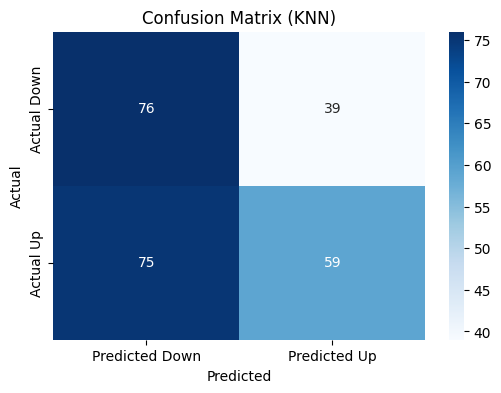

Accuracy Score: 0.5421686746987951

Classification Report:

              precision    recall  f1-score   support

        Down       0.50      0.66      0.57       115
          Up       0.60      0.44      0.51       134

    accuracy                           0.54       249
   macro avg       0.55      0.55      0.54       249
weighted avg       0.56      0.54      0.54       249



In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()

# Print precision, recall, F1, and accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))


# Adding features

In [127]:
import pandas as pd
import numpy as np
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# -------------------------------
# Feature Engineering
# -------------------------------
df = data.copy()

# 1. Lagged Returns (1–5 days)
df['Return'] = df['Close'].pct_change()
for lag in range(1, 6):
    df[f'Return_t-{lag}'] = df['Return'].shift(lag)

# 2. Lagged Volume (1–5 days)
for lag in range(1, 6):
    df[f'Volume_t-{lag}'] = df['Volume'].shift(lag)

# 3. Ratios & Normalisations
df['Close_SMA20'] = df['Close'] / df['Close'].rolling(20).mean()  # only keep ratio
df['High_Low'] = df['High'] / df['Low']
df['Close_Open'] = df['Close'] / df['Open']


# 4. Volatility & Risk
df['RollingStd_20'] = df['Close'].rolling(20).std()
df['ATR_14'] = (df['High'] - df['Low']).rolling(14).mean()
df['SquaredReturn'] = df['Return']**2

# 5. Momentum & ROC
df['Momentum_5'] = df['Close'] - df['Close'].shift(5)
df['Momentum_10'] = df['Close'] - df['Close'].shift(10)
df['ROC_5'] = df['Close'].pct_change(5)
df['ROC_10'] = df['Close'].pct_change(10)


# RSI (14)
delta = df['Close'].diff()

gain = delta.where(delta > 0, 0)   # keep positive diffs
loss = -delta.where(delta < 0, 0)  # keep negative diffs

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))



# MACD (12,26) and Signal (9)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger %B (20, 2 std)
sma20 = df['Close'].rolling(20).mean()
std20 = df['Close'].rolling(20).std()
upper = sma20 + 2 * std20
lower = sma20 - 2 * std20
df['Bollinger_%B'] = (df['Close'] - lower) / (upper - lower)

# 7. Volume Indicators
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
df['MFI'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
df['VPT'] = (df['Volume'] * (df['Close'].pct_change())).cumsum()

# 8. Z-Scores
for win in [5, 10, 20]:
    rolling_mean = df['Close'].rolling(win).mean()
    rolling_std = df['Close'].rolling(win).std()
    df[f'ZScore_{win}'] = (df['Close'] - rolling_mean) / rolling_std

# 9. Sharpe-like ratio
df['SharpeLike_20'] = df['Return'].rolling(20).mean() / df['Return'].rolling(20).std()

# -------------------------------
# Finalise Dataset
# -------------------------------
df.dropna(inplace=True)

# Define Features (same for KNN, SVM, RF, XGBoost)
features = [
    'Return_t-1','Return_t-2','Return_t-3','Return_t-4','Return_t-5',
    'Volume_t-1','Volume_t-2','Volume_t-3','Volume_t-4','Volume_t-5',
    'Close_SMA20','High_Low','Close_Open',
    'RollingStd_20','ATR_14','SquaredReturn',
    'Momentum_5','Momentum_10','ROC_5','ROC_10',
    'RSI_14','MACD','MACD_Signal','Bollinger_%B',
    'OBV','MFI','VPT',
    'ZScore_5','ZScore_10','ZScore_20',
    'SharpeLike_20'
]

X = df[features]
y = df['Target']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Feature matrix shape: (2977, 31)
Target distribution:
 Target
0    1525
1    1452
Name: count, dtype: int64


In [117]:
# After all feature engineering
df.dropna(inplace=True)

# Define features and target from same df
X = df[features]
y = df['Target']

print("Shapes after cleaning:", X.shape, y.shape)


Shapes after cleaning: (2977, 31) (2977,)


In [118]:
# Ensure index is datetime
df.index = pd.to_datetime(df.index)

X_train = X.loc["2014-01-01":"2023-12-31"]
y_train = y.loc["2014-01-01":"2023-12-31"]

X_test = X.loc["2024-01-01":"2024-12-31"]
y_test = y.loc["2024-01-01":"2024-12-31"]

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (2497, 31) (2497,)
Test shapes: (249, 31) (249,)


In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


Scaled shapes: (2497, 31) (249, 31)


In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_neighbors': list(range(2, 31)),      # try k = 2 … 30
    'weights': ['uniform', 'distance'],     # distance weighting can help
    'metric': ['euclidean', 'manhattan']    # test different distance metrics
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
print("Best KNN Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 116 candidates, totalling 348 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.47      0.65      0.54       115
           1       0.55      0.36      0.43       134

    accuracy                           0.49       249
   macro avg       0.51      0.51      0.49       249
weighted avg       0.51      0.49      0.48       249



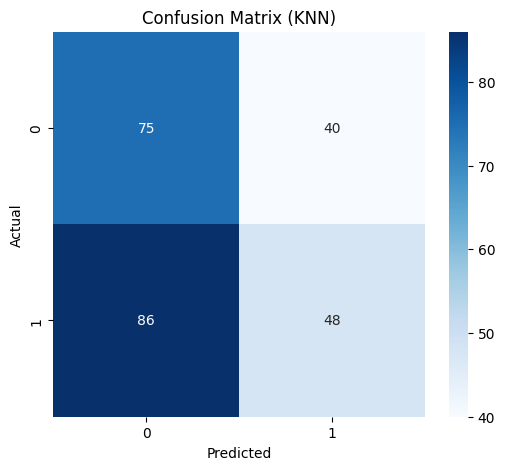

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = best_knn.predict(X_test_scaled)

# Report
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()


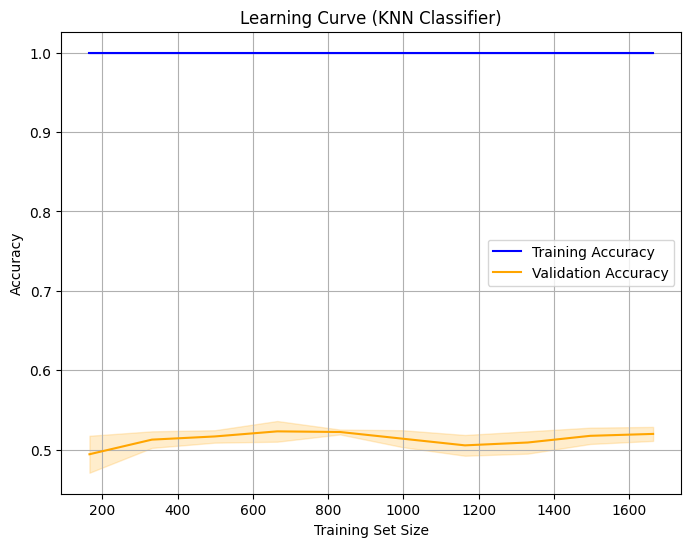

In [122]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_knn,
    X_train_scaled,
    y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10% to 100% of training data
    shuffle=False   # keep time order since it's time-series
)

# Mean & std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (KNN Classifier)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


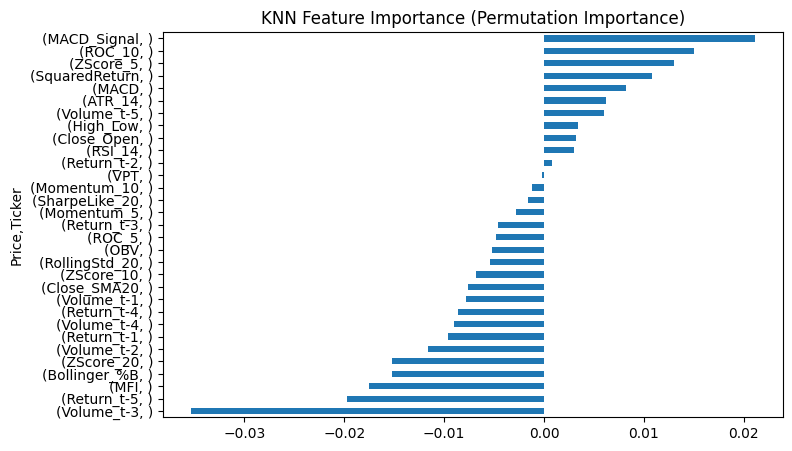

In [124]:
from sklearn.inspection import permutation_importance

# Run permutation importance using the best KNN model
result = permutation_importance(best_knn, X_test_scaled, y_test,
                                n_repeats=20, random_state=42, n_jobs=-1)

# Convert results into a Series for plotting
importances = pd.Series(result.importances_mean, index=X_train.columns)

# Plot feature importance
importances.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("KNN Feature Importance (Permutation Importance)")
plt.show()
####### negative means good #######